In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn import mixture

from tqdm.notebook import tqdm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [2]:
filename = '../Solutions/formationchannels.npy'
data = np.load(filename)
data, data.shape

(array([[14.50511868],
        [12.87667636],
        [14.28071691],
        ...,
        [37.34714206],
        [28.62818454],
        [28.52640407]]),
 (2950, 1))

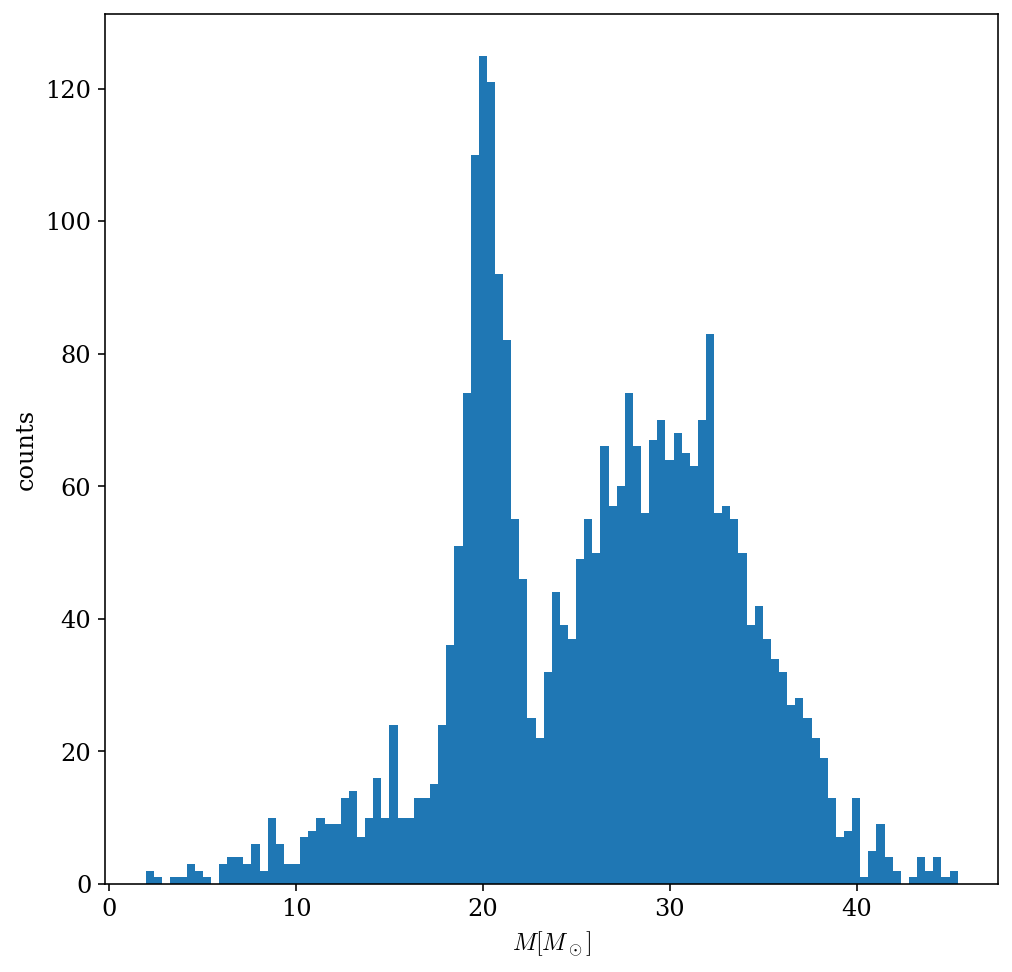

In [3]:
plt.hist(data, bins = 100)
plt.xlabel(r'$M[M_\odot]$')
plt.ylabel('counts')
plt.show()

**guess**: 3 modes?

In [4]:
tries = np.arange(1, 11, 1) #range 1-10

In [5]:
gm = [mixture.GaussianMixture(n_components = N, tol = 1e-5, n_init = 20) for N in tries]
gm_fitted = [model.fit(data) for model in gm] #fitted models
aics = [model.aic(data) for model in gm_fitted] #Akaike information criterion

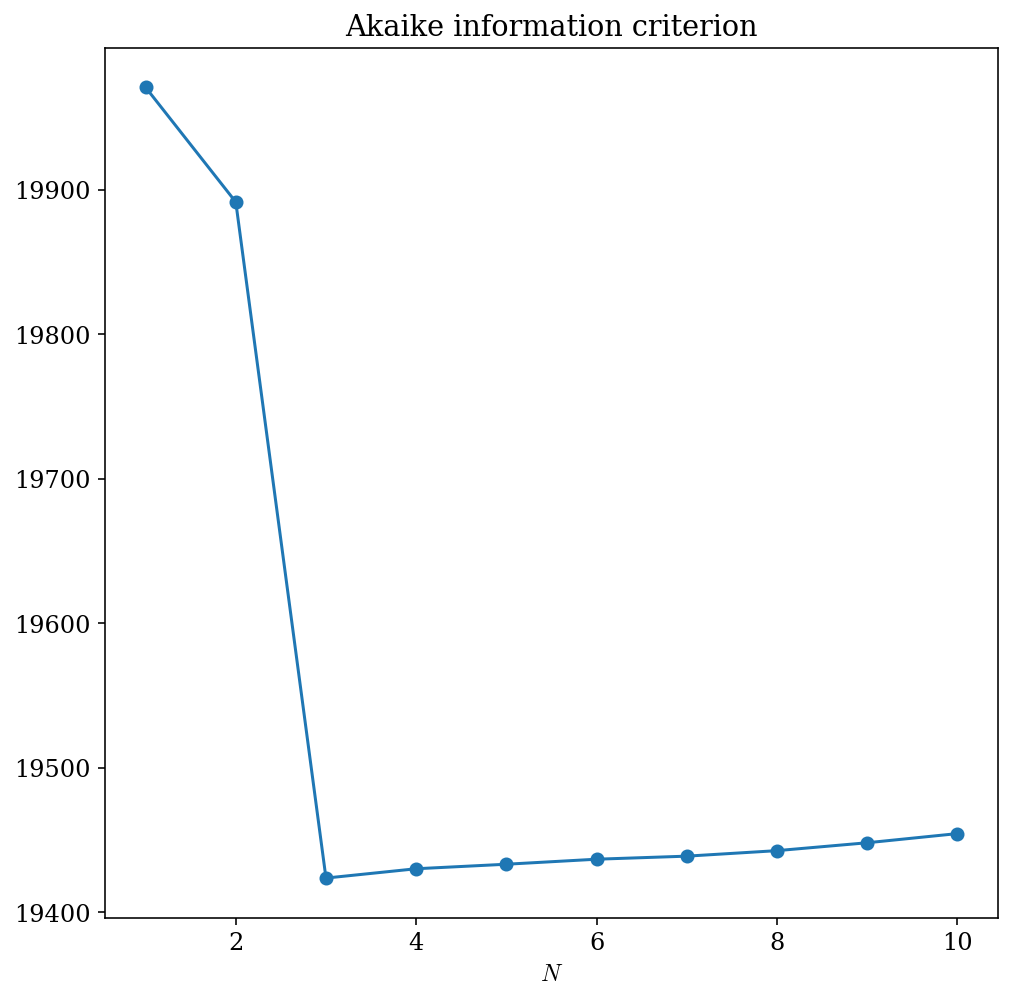

In [6]:
plt.plot(tries, aics, marker = 'o')
plt.xlabel(r'$N$')
plt.title('Akaike information criterion')
plt.show()

In [7]:
print('The best number of gaussians is N = %.i ' % tries[np.argmin(aics)])

The best number of gaussians is N = 3 


In [19]:
best_model = gm_fitted[np.argmin(aics)]
data_sorted = np.sort(data, axis = 0) #for plotting

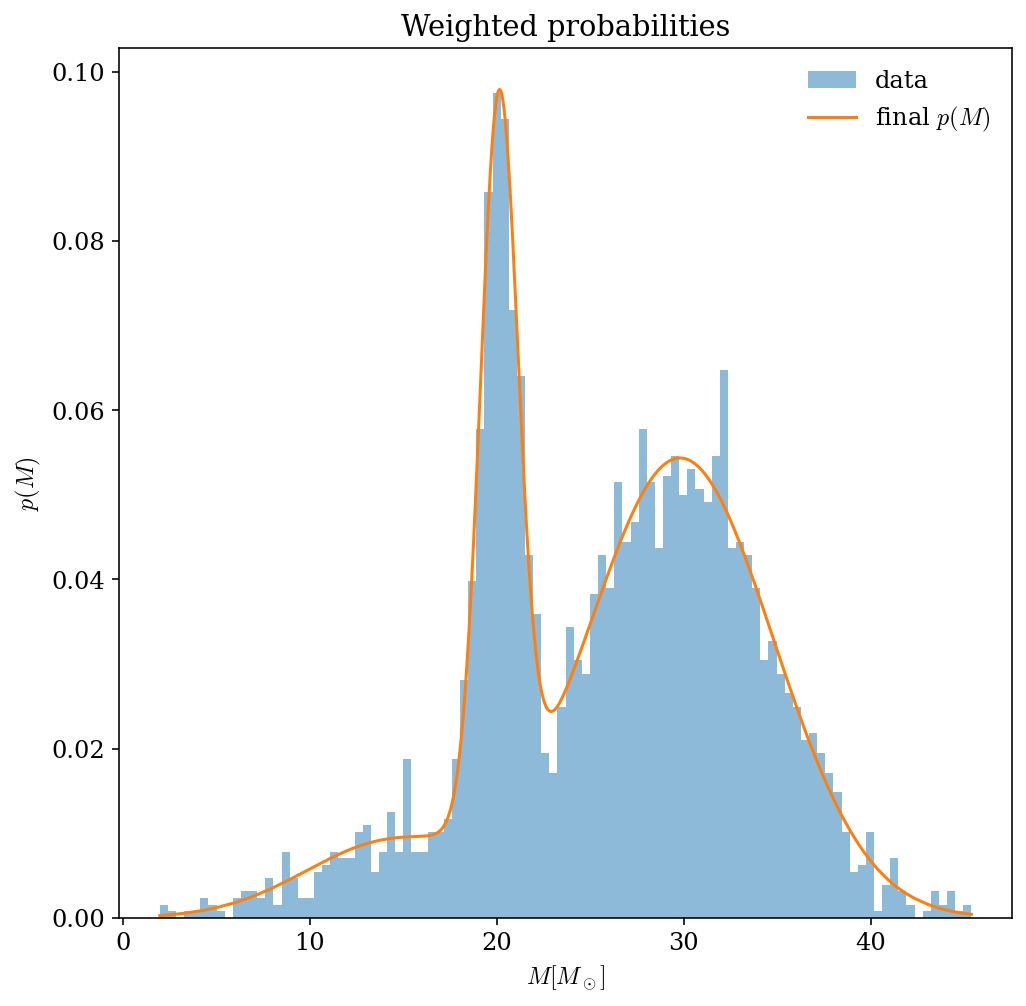

In [20]:
plt.hist(data, bins = 100, alpha = 0.5, density = True, label = 'data')
plt.plot(data_sorted[:,0], np.exp(best_model.score_samples(data_sorted)), label = r'final $p(M)$')

plt.xlabel(r'$M[M_\odot]$')
plt.ylabel(r'$p(M)$')
plt.legend(frameon = False)
plt.title('Weighted probabilities')
plt.show()

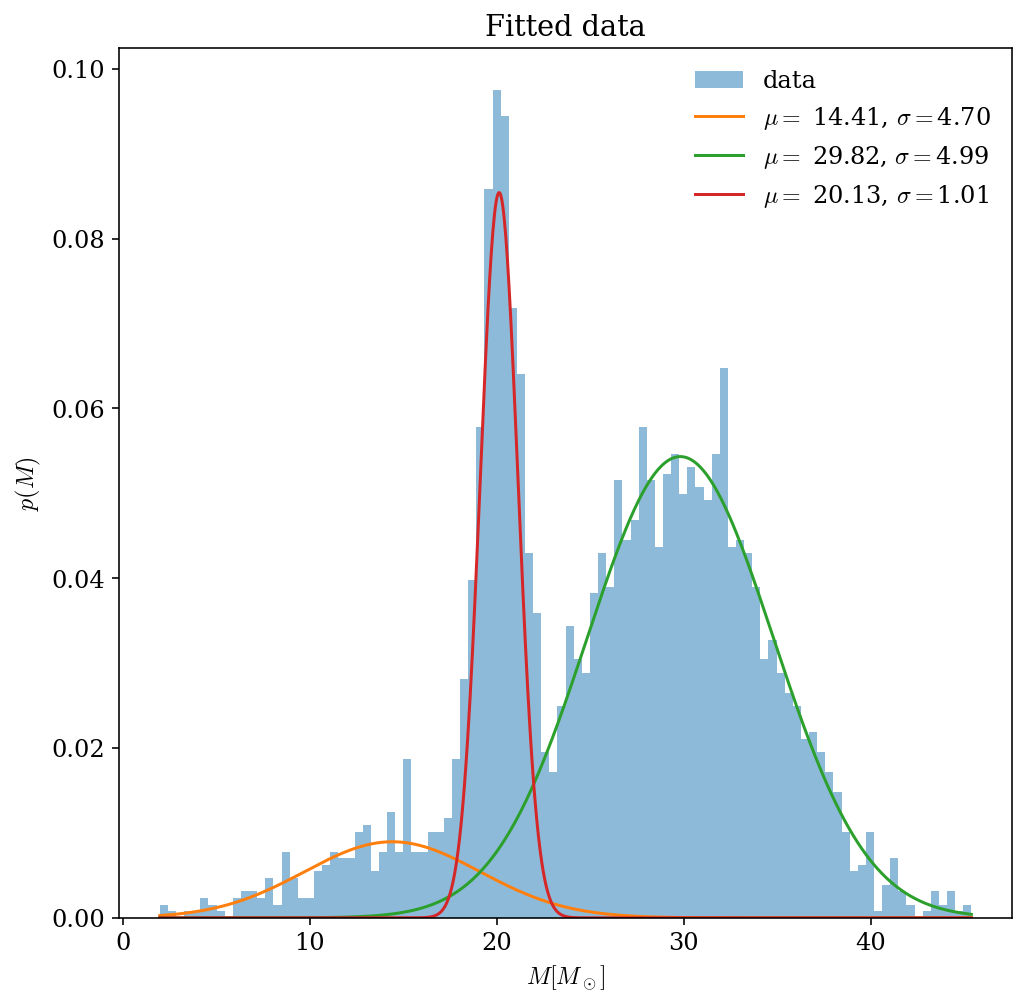

In [21]:
#single gaussians
plt.hist(data, bins = 100, alpha = 0.5, density = True, label = 'data')
gaussians = [norm(mu, sigma) for mu, sigma in zip(best_model.means_[:,0], np.sqrt(best_model.covariances_[:,0]))]

x_grid = np.linspace(data.min(), data.max(), 1000)

[plt.plot(x_grid, weight * gaussian.pdf(x_grid), label = r'$\mu =$ %.2f, $\sigma = $%.2f' % (mu, sigma) )
 for weight, gaussian, mu, sigma in zip(best_model.weights_, gaussians, best_model.means_[:,0], np.sqrt(best_model.covariances_[:,0]))]

plt.xlabel(r'$M[M_\odot]$')
plt.ylabel(r'$p(M)$')
plt.title('Fitted data')
plt.legend(frameon = False)
plt.show()

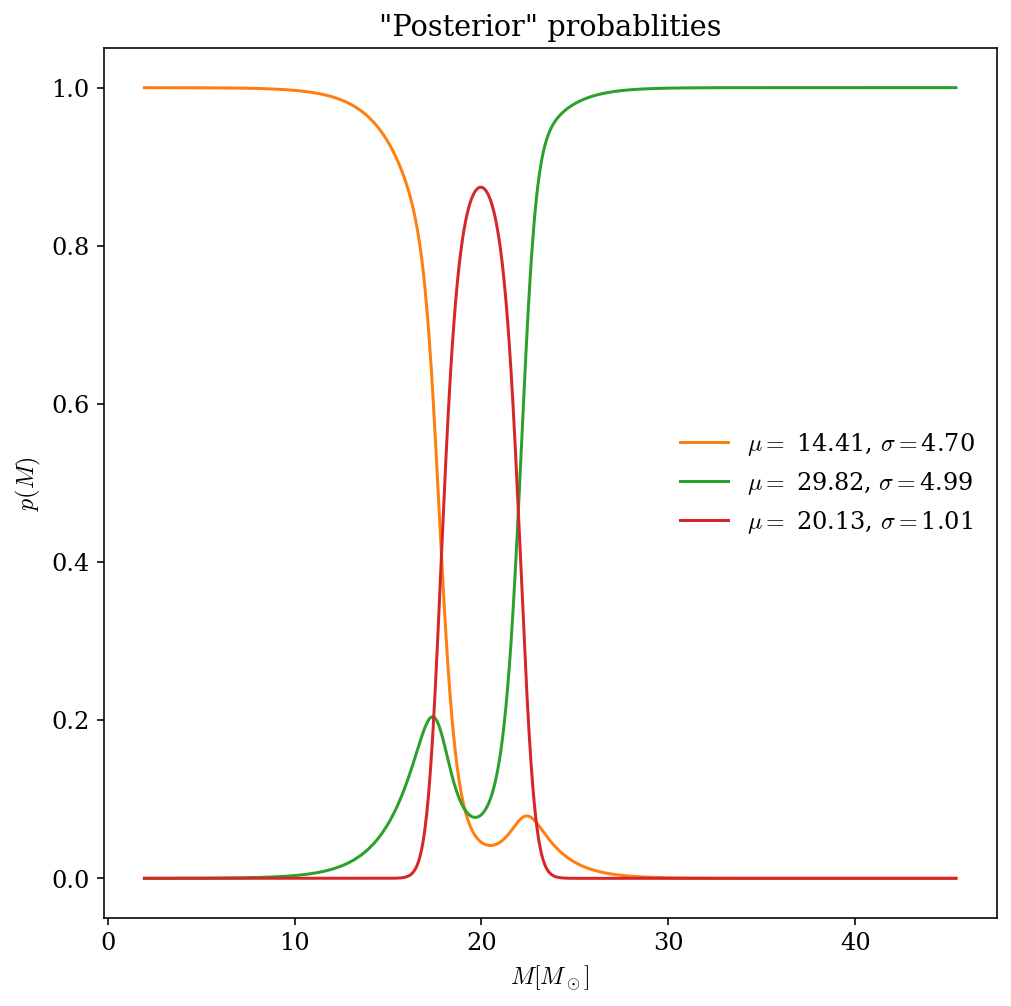

In [23]:
#"posterior" probabilities
[plt.plot(data_sorted[:,0], best_model.predict_proba(data_sorted)[:, i], c=c, label = r'$\mu =$ %.2f, $\sigma = $%.2f' % (mu, sigma)) 
 for i, mu, sigma,c in zip(np.arange(0, np.argmin(aics) + 1, 1), best_model.means_[:,0], np.sqrt(best_model.covariances_[:,0]), ['C1', 'C2', 'C3'])]
plt.legend(frameon = False)

plt.xlabel(r'$M[M_\odot]$')
plt.ylabel(r'$p(M)$')
plt.title('"Posterior" probablities')
plt.show()